# Exercise Sheet 4 - Programming Tasks

## Exercise 6 - Out of Vocabulary (OOV)

In [5]:
from nltk.tokenize import RegexpTokenizer
import operator
import matplotlib.pyplot as plt

def get_tokens(text_file):
    
    # ingore white spaces and symbols
    tokenizer = RegexpTokenizer(r'\w+')
    
    # open the text file and extract the tokens
    with open(text_file, 'r', encoding='utf-8') as f:

        # tokenize text and remove punctuation
        tokens = tokenizer.tokenize(f.read())
    
    
        # lowercase tokens
        tokens = [x.lower() for x in tokens]
    return tokens

def create_vocab(text_file, vocab_size=-1):
    '''
    Returns the vocabulary of the input text of a given size. If vocab_size is -1, then all vocabularies will be included
    '''
    # extract tokens from text
    tokens = get_tokens(text_file)
        
    # count the frequencies
    vocab_dir = {}
    for word in tokens:
        vocab_dir[word] = vocab_dir.get(word, 0) + 1
        
    # sort by frequencies
    vocab_sorted = sorted(vocab_dir.items(), key=operator.itemgetter(1), reverse=True)

    # return the most frequent tokens with their frequencies
    vocab_sized = vocab_sorted[0:min(vocab_size, len(vocab_sorted))]
    
    # return only the words
    return [sample[0] for sample in vocab_sized]


def get_oov(vocabulary, text_file):
    
    # extract tokens from text
    tokens = get_tokens(text_file)
    
    oov_words = []
    
    for token in tokens:
        if token not in vocabulary:
            oov_words.append(token)
            
    return len(oov_words) / float(len(tokens))
    
# create vocabularies
vocabs = []
vocabs.append(create_vocab("Materials/train/train1.txt"))
vocabs.append(create_vocab("Materials/train/train2.txt"))
vocabs.append(create_vocab("Materials/train/train3.txt"))
vocabs.append(create_vocab("Materials/train/train4.txt"))
vocabs.append(create_vocab("Materials/train/train5.txt"))

# vocabulary sizes
vocab_sizes = [len(vocabulary) for vocabulary in vocabs]

# oov values of test text
oov_vals = [get_oov(vocabulary, "Materials/test/test.txt") for vocabulary in vocabs]

FileNotFoundError: [Errno 2] No such file or directory: 'Materials/train/train1.txt'

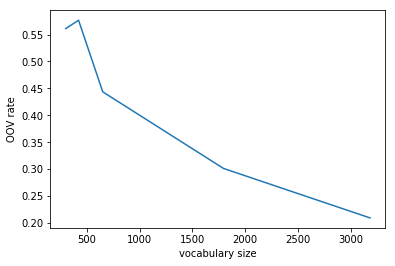

In [2]:
plt.plot(vocab_sizes, oov_vals)
plt.xlabel('vocabulary size')
plt.ylabel('OOV rate')
plt.show()

Explanation: When the vocabulary contains a small amount of words the probability that a word appears in a test text which is not in the vocabulary is higher then for vocabulary with a higher amount of words. Therefore, the larger the vocabulary size the lower will be the OOV value for a test set. <br><br>
OOV words might be probematic, as after learning a language model with training data, probability values are only computed for words in the (training) vocabulary. When computing a bigram probability in a certain test text it may happen that one of the two words is an OOV word and therefore does not have a trained probability i.e. its probability is 0. A 0-probability cannot be used for further computation. <br>

A solution is to apply a smoothing method, which prevents 0-probabilities. Smoothing redistributes the probabilities of all words including OOV words and therefore manages that these words do not appear with probability 0.

Furthermore, applying back-offs could be applied i.e. one ignores the history sequence (in this case one word) and threrefore transforms the bigram to a unigram and therefore prevents a zero-probability.

## Exercise 7

In [7]:
import nltk
import re
import numpy as np
# nltk.download('gutenberg')


def sanitize_text(tokens):
    """Sanizite Text:
        Lowercase
        Remove non characters
        Change your and yours to you
        Remove ['ll', 've', 're']
    Parameters
    ----------
    tokens : string[]
        Tokenized text

    Returns
    -------
    string[]
        Sanitized tokens.

    """

    tokens = [x.lower() for x in tokens]
    regex = re.compile('[^a-z]')

    variations_you = ['your', 'yours']
    remove = ['ll', 've', 're']

    for index in range(len(tokens)):
        if tokens[index] in variations_you:
            tokens[index] = 'you'

        if tokens[index] in remove:
            tokens[index] = ''

        tokens[index] = regex.sub('', tokens[index])

    # remove empty elements
    tokens = [token for token in tokens if token != '']
    return tokens


def write_file(file_path, tokens):
    f = open(file_path, 'w')
    f.write(' '.join(tokens))
    f.close()


def calc_correlation(distance, tokens):
    """Calculate correlations for a given distance

    Parameters
    ----------
    distance : integer
        The distance d.
    tokens : string[]
        Tokenized text

    Returns
    -------
    double
        The correlation for a given distance
    """

    YOU = 'you'
    # Count 'you' with distance d
    count_you_sequence = 0

    # count how often the word 'you' appears in the text
    count_you = tokens.count(YOU)

    for i in range(len(tokens) - distance):
        if tokens[i] == YOU and tokens[i + distance] == YOU:
            count_you_sequence += 1

    if count_you_sequence == 0:
        print('No instance of you with distance d = ' + str(distance))
        return 0

    # calcualte the relative frequencies
    rel_freq_you_sequence = count_you_sequence / float(len(tokens) - distance)
    rel_freq_total = count_you / float(len(tokens))

    corr = rel_freq_you_sequence / float(rel_freq_total * rel_freq_total)
    print("Correlation distance " + str(distance) + " :" + str(corr))
    return corr


def plot_correlation(tokens, max_distance):
    distances = np.zeros(max_distance)
    correlations = np.zeros(max_distance)

    for d in range(0, max_distance):
        distances[d] = d + 1
        correlations[d] = calc_correlation(d + 1, tokens)

    plt.scatter(distances, correlations)
    plt.ylabel('Correlation')
    plt.xlabel('Distance')
    plt.show()

Correlation distance 1 :0.3601043363388638
Correlation distance 2 :2.4007838559327794
Correlation distance 3 :2.881046571319207
Correlation distance 4 :1.6806723052649748
Correlation distance 5 :2.6411536095053365
Correlation distance 6 :2.040966485895572
Correlation distance 7 :3.0015316938024568
Correlation distance 8 :2.7615107255028466
Correlation distance 9 :1.5609113001012764
Correlation distance 10 :2.8817883989510484
Correlation distance 11 :1.921262937008968
Correlation distance 12 :2.882000419875044
Correlation distance 13 :2.521843136782099
Correlation distance 14 :1.6812906086662203
Correlation distance 15 :2.522028696043111
Correlation distance 16 :1.561313300804025
Correlation distance 17 :2.522214282613334
Correlation distance 18 :2.5223070861412835
Correlation distance 19 :1.6815999309991978
Correlation distance 20 :1.8017805097761628
Correlation distance 21 :2.0420930543330487
Correlation distance 22 :1.2012754135982189
Correlation distance 23 :2.2825072818358003
Corre

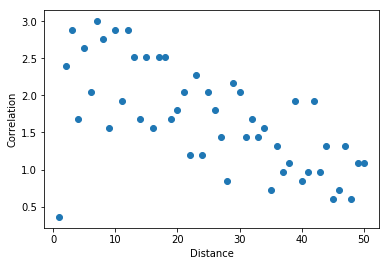

In [8]:
text = nltk.corpus.gutenberg.words('carroll-alice.txt')
tokens = sanitize_text(text)
write_file('output.txt', tokens)

plot_correlation(tokens, 50)
